# Evaluation

## Results

#### Auto-Mode
Nutzt eine Heuristic, eine SInE Strategy und eine Selection Function
#### Satauto-Mode
Nutzt eine Heuristic und eine Selection Function
#### Filter-after-Union
Wendet einen SInE Filter mit b=5 und k=3 nach dem Union Select mit dem Goal als Seed auf die von Union Select gewählte Menge an
#### Merge-Filter
Wendet mehrer SInE Filter mit den von Union Select gewählten Goals auf admine.sumo an und merged die Ergebnisse.  
b=5 bedeutet folgende SInE Strategien: b=5 & k=1, b=4 & k=2, ... , b=1 & k=5

### Importe

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

### Ergebnisse

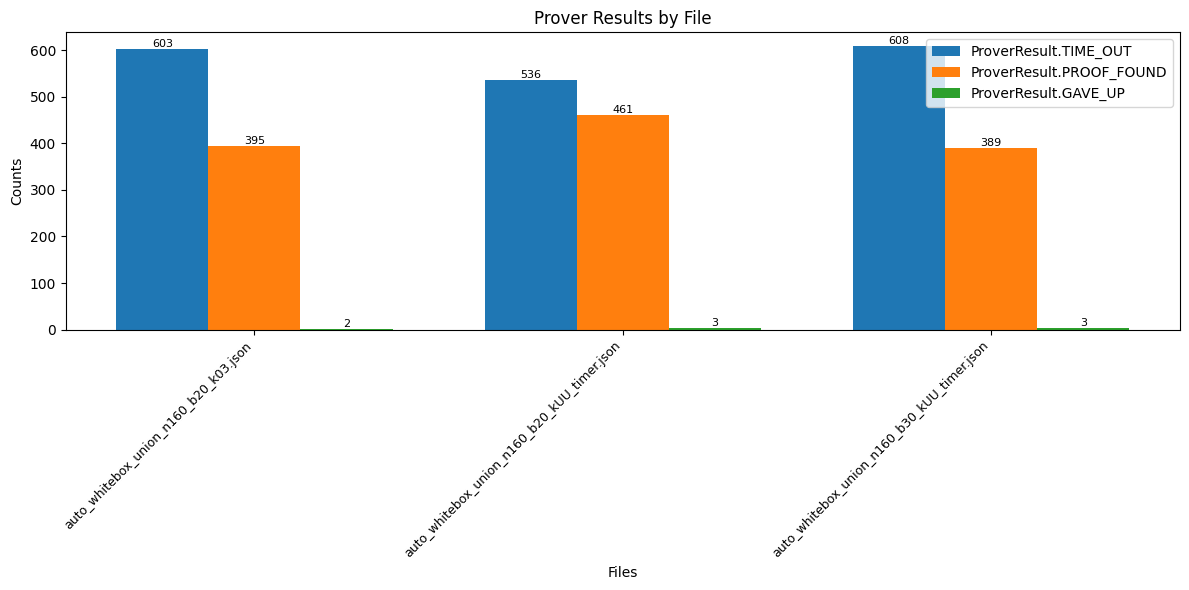

In [3]:
with open('./summary_timer_autounion.json', 'r') as file:
    data = json.load(file)
    
# Result categories
categories = ["ProverResult.TIME_OUT", "ProverResult.PROOF_FOUND", "ProverResult.GAVE_UP"]

# Extract data for plotting
files = list(data.keys())
n_files = len(files)
n_categories = len(categories)

# Initialize an array for category counts
category_counts = np.zeros((n_files, n_categories), dtype=int)

# Fill the category counts
for i, (file, results) in enumerate(data.items()):
    for j, category in enumerate(categories):
        # Get the count for each category, defaulting to 0 if not present
        category_counts[i, j] = results.get(category, 0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
index = np.arange(n_files)

# Plot a bar for each category
bars = []
for j, category in enumerate(categories):
    bars.append(ax.bar(index + j * bar_width, category_counts[:, j], bar_width, label=category))

# Add labels, legend, and title
ax.set_xlabel('Files')
ax.set_ylabel('Counts')
ax.set_title('Prover Results by File')
ax.set_xticks(index + bar_width * (n_categories - 1) / 2)
ax.set_xticklabels(files, rotation=45, ha='right', fontsize=9)
ax.legend()

# Add count labels above the bars
for bar_group in bars:
    for bar in bar_group:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=8)

# Adjust layout to ensure labels fit
plt.tight_layout()

# Display the plot
plt.show()

#### Erkenntnisse
Die Anwendung von Union erzielt in Kombination mit satauto bessere Ergebnisse, als der auto-Modus von E.  
Die Verknüpfung von mehreren SInE Strategien in Kombination mit satauto erzielt das beste Ergebnis.

### Anzahl der Variablen wenn Proof Found und gesamt

In [4]:
def counts(file_path: str):
    with open(file_path) as f:
        data = json.load(f)

    # Prepare a list to store the means for each JSON file
    means = []

    # Iterate over each JSON dataset
    for file_name, counts in data.items():
        # Calculate the mean of variable counts
        variable_counts = list(counts.values())
        mean_variable_count = sum(variable_counts) / len(variable_counts)
        means.append((file_name, mean_variable_count))

    # Convert to a DataFrame for plotting
    df_means = pd.DataFrame(means, columns=['File', 'MeanVariableCount'])

    # Plot the data
    plt.figure(figsize=(12, 6))
    bars = plt.barh(df_means['File'], df_means['MeanVariableCount'], color='skyblue')
    plt.xlabel('Mean Variable Count')
    plt.title('Mean Variable Count per JSON File')
    plt.tight_layout()

    # Add text annotations (mean values) above the bars
    for bar in bars:
        plt.text(
            bar.get_width(),         # x-coordinate, right at the end of each bar
            bar.get_y() + bar.get_height() / 2,  # y-coordinate centered on the bar
            f'{bar.get_width():.2f}',   # annotation text (formatted mean value)
            va='center',              # vertical alignment
            ha='left',                # horizontal alignment
            color='black',            # text color
            fontsize=10              # font size
        )

    plt.show()

# Example usage
# variable_counts('evaluation/variable_counts_grouped.json')

##### Proof Found

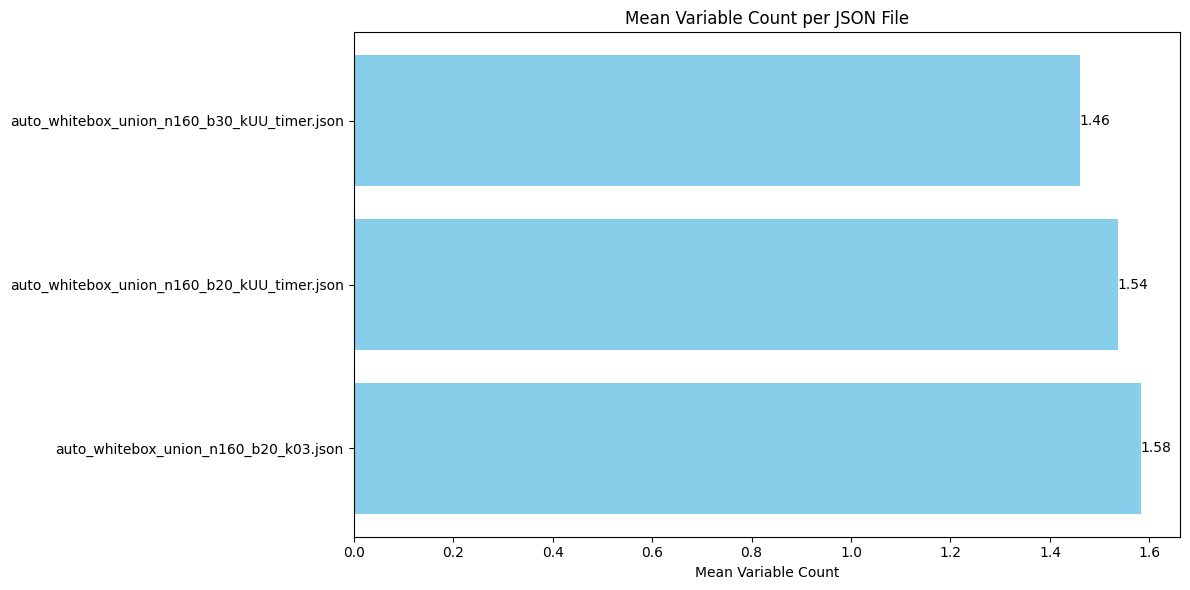

In [8]:
counts("variable_counts_grouped_proof_found_timer_autounion.json")

##### All

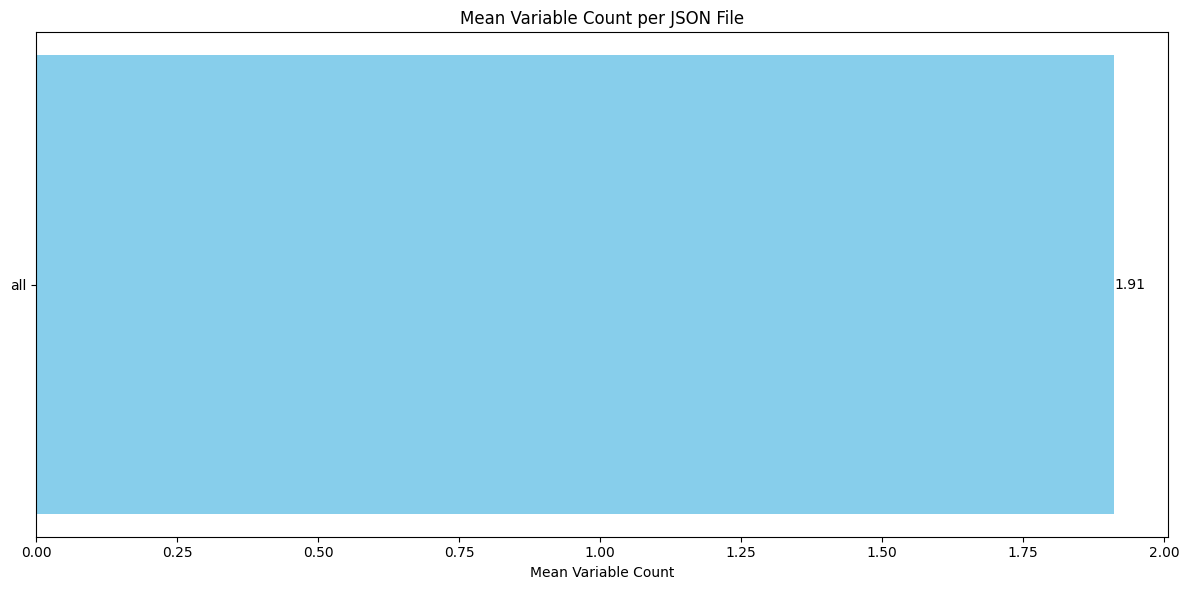

In [5]:
counts("variable_counts_grouped_all.json")

#### Count signs |, &, ?, !, ~

##### Proof Found

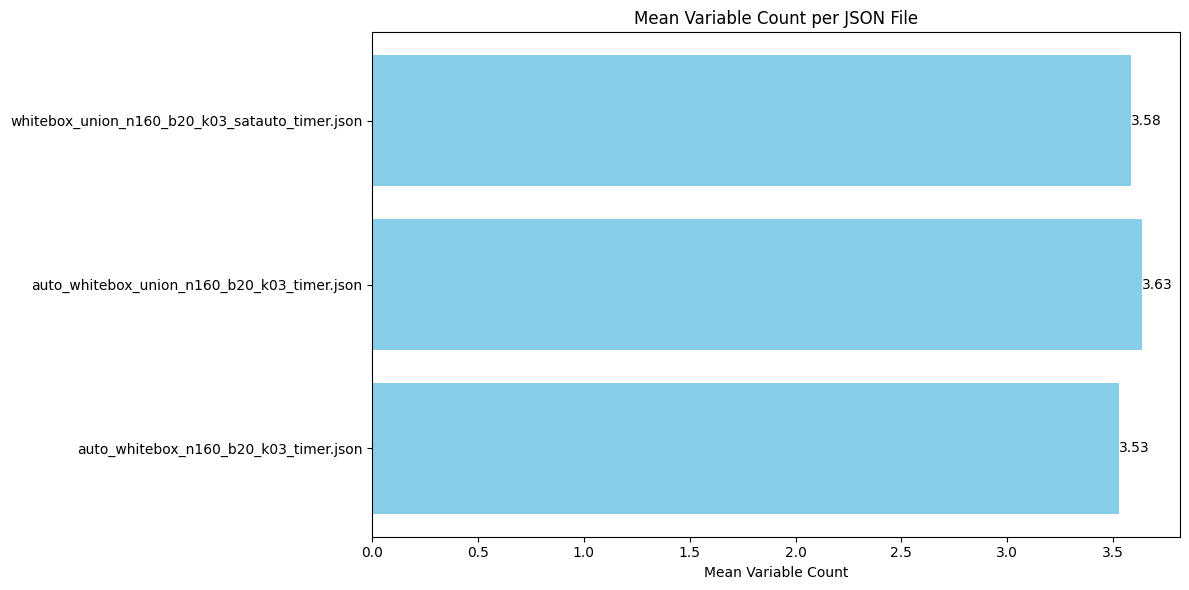

In [6]:
counts("signs_counts_grouped_proof_found_timer.json")

##### All

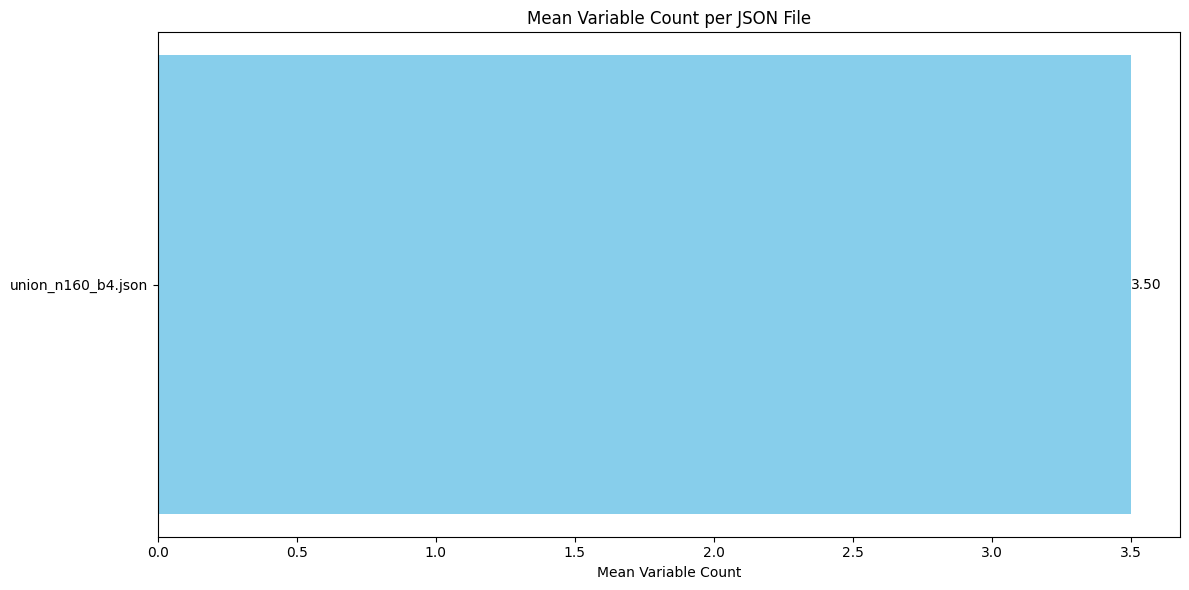

In [7]:
counts("signs_counts_grouped_all.json")

#### Character Count

##### Proof Found

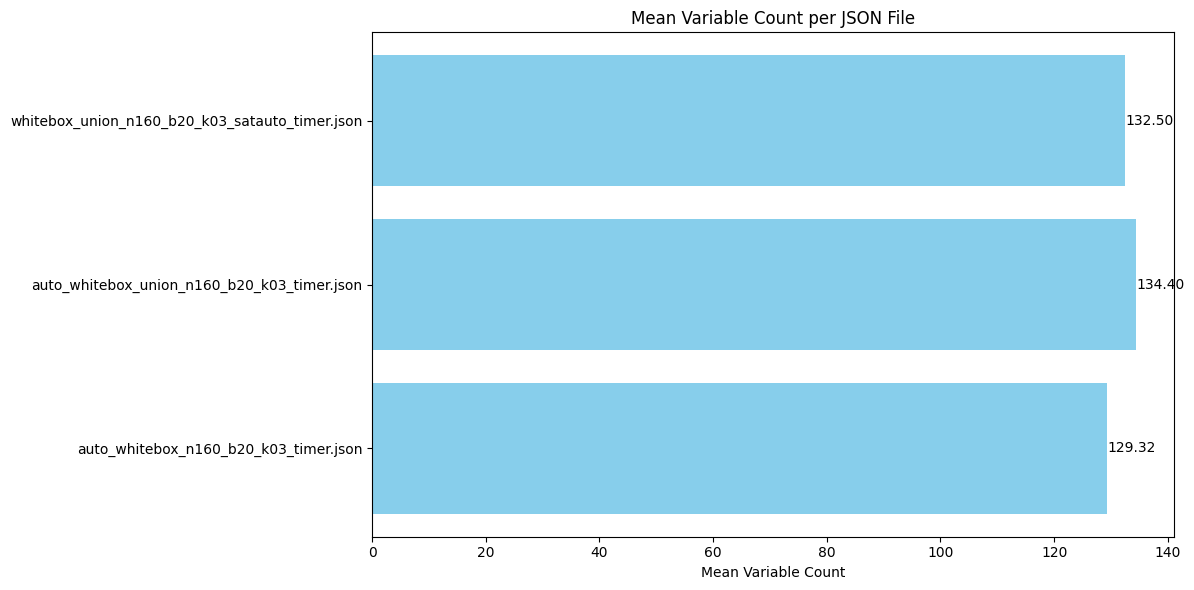

In [8]:
counts("character_counts_grouped_proof_found_timer.json")

##### All

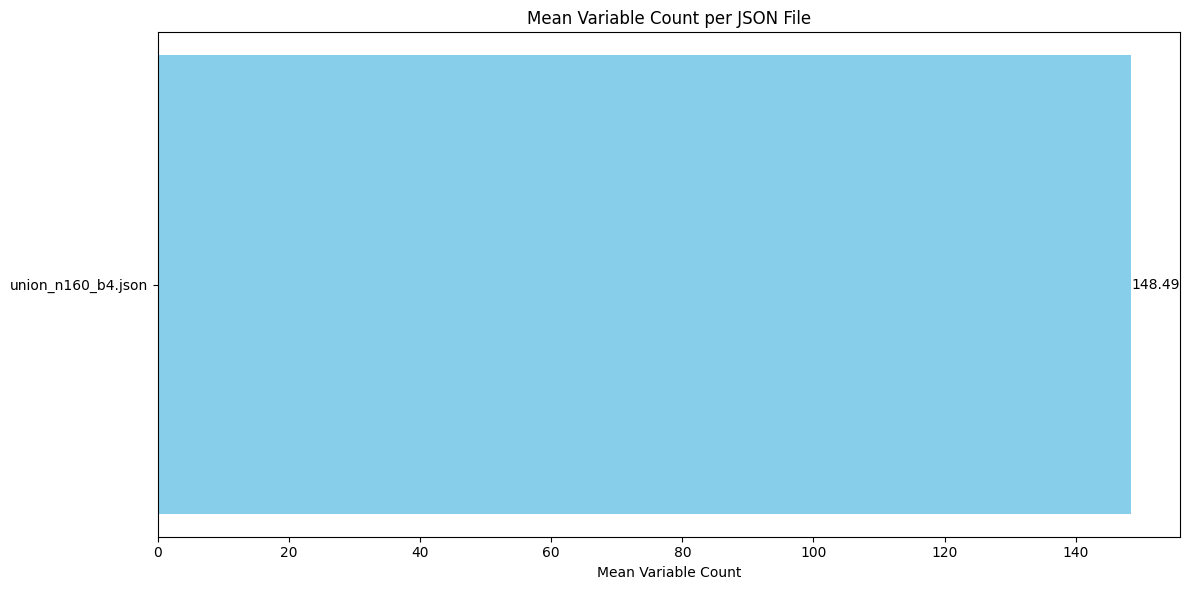

In [9]:
counts("character_counts_grouped_all.json")

#### How often do the used variables appear as variables in adimen.sumo

##### Proof Found

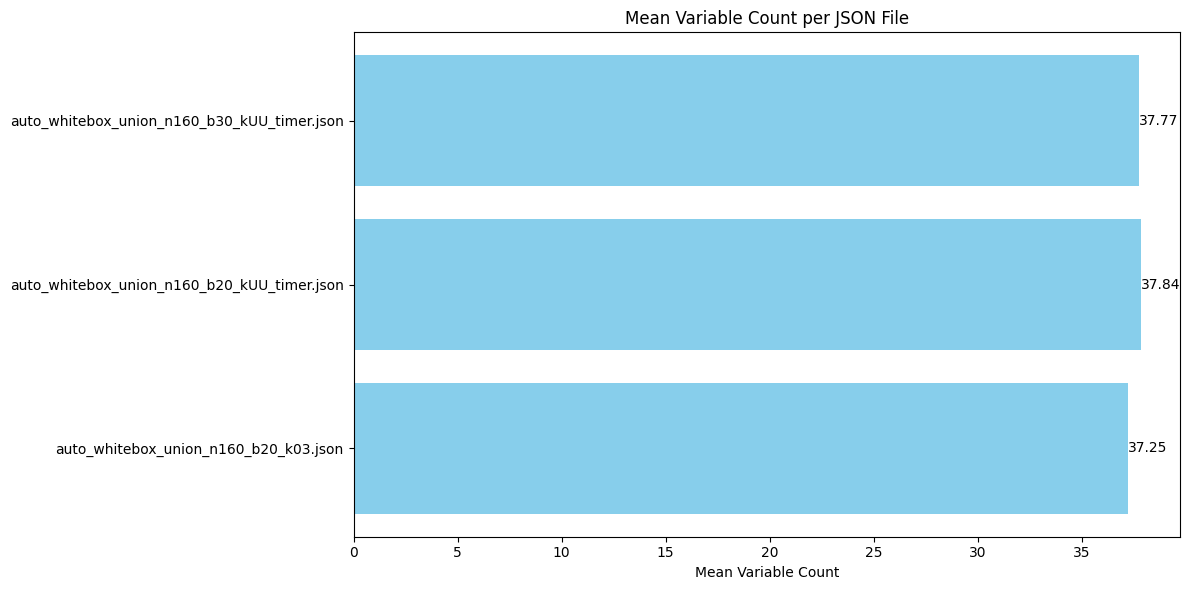

In [9]:
counts("variable_count_names_grouped_proof_found_autounion.json")

##### All

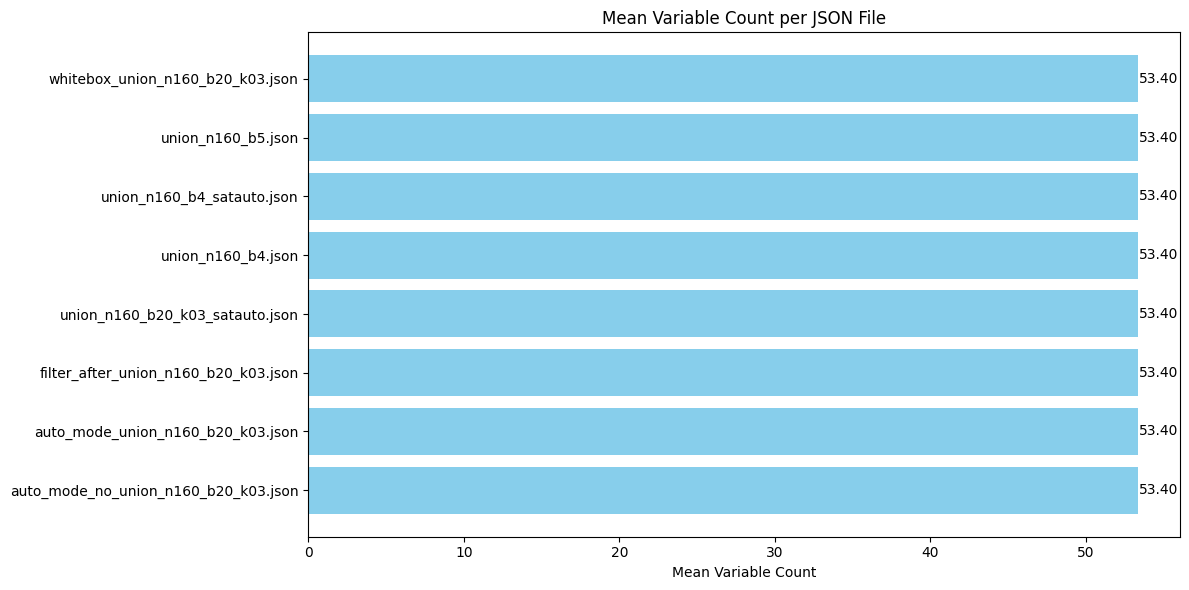

In [11]:
counts("variable_count_names_grouped_all.json")

Wie oft tritt eine Variable auf - Anzahl der Klauseln zählen in denen die Variable vorkommt  
Neue Fälle für den Union  
Warum kann man besser sein als so ein syntaktischer Solver - sind die Fälle identisch die mehr geschaffen werden? -> Fälle die sich unterscheiden sind spannend  
Zwei TimeOuts nutzen - wie viele Fälle bekommt man mit 2s oder 10s oder 100s  
Schnelligkeit messen wie lange es dauert - ist mir Union schneller?  
Man optimiert gegen den Testsatz mit WhiteBoxProofTest - kann man Axiom künstlich verlängern: alpha impliziert beta wird zu alpha impliziert beta1, beta1 impliziert beta2, beta2 impliziert beta ---> Text verlängern
Kleinerer TimeOut für erstere Studien
Semantische Nähe

Vampire als Gegenmodell zur Validität

Titel: 
- Can semantic similarities of words enhance commen sense reasoning? A case study with prover E and SUMO.
- Buzzwords: Semantic word similarity - commen sense reasoning

Hypthese: durch semantische Nähe geben wir was rein, was E so nicht wissen kann.


In [12]:
with open('../result_timer/auto_whitebox_n160_b20_k03_timer.json', 'r') as file:
    auto_no_union = json.load(file)
with open('../result_timer/auto_whitebox_union_n160_b20_k03_timer.json', 'r') as file:
    auto_union = json.load(file)
with open('../result_timer/whitebox_union_n160_b20_k03_satauto_timer.json', 'r') as file:
    satauto = json.load(file)

In [13]:
auto_no_union_proof = []
for i in auto_no_union:
    if auto_no_union[i][0] == "ProverResult.PROOF_FOUND":
        time = auto_no_union[i][2]
        auto_no_union_proof.append((i, time))
auto_union_proof = []
for i in auto_union:
    if auto_union[i][0] == "ProverResult.PROOF_FOUND":
        time = auto_union[i][2]
        auto_union_proof.append((i, time))
satauto_proof = []
for i in satauto:
    if satauto[i][0] == "ProverResult.PROOF_FOUND":
        time = satauto[i][2]
        satauto_proof.append((i, time))

In auto_no_union_proof but not in others

In [37]:
def find_diff_entries(list1, list2):
    """
    Find entries in list1 that have paths not present in list2.

    Parameters:
    list1 (list of tuples): The first list, each tuple has a path and a value.
    list2 (list of tuples): The second list, each tuple has a path and a value.

    Returns:
    list of tuples: Entries from list1 with paths not found in list2.
    """
    # Extract paths from each list
    paths_list1 = {entry[0] for entry in list1}
    paths_list2 = {entry[0] for entry in list2}

    # Find unique paths in list1 that are not in list2
    unique_paths_list1 = paths_list1 - paths_list2

    # Build the list of unique entries based on the unique paths
    unique_entries = [entry for entry in list1 if entry[0] in unique_paths_list1]

    return unique_entries

In [38]:
with open('../result_timer/auto_whitebox_union_n160_b20_kUU_timer.json', 'r') as file:
    unionKuu = json.load(file)
auto_union_kUU_proof = []
for i in unionKuu:
    if unionKuu[i][0] == "ProverResult.PROOF_FOUND":
        time = unionKuu[i][2]
        auto_union_kUU_proof.append((i, time))

In [39]:
no_union_without_uniionKuu = find_diff_entries(auto_no_union_proof, auto_union_kUU_proof)

In [41]:
no_union_without_union = find_diff_entries(auto_no_union_proof, auto_union_proof)
no_union_without_satauto = find_diff_entries(auto_no_union_proof, satauto_proof)
union_without_nounion = find_diff_entries(auto_union_proof, auto_no_union_proof)
union_without_satauto = find_diff_entries(auto_union_proof, satauto_proof)
satauto_without_nounion = find_diff_entries(satauto_proof, auto_no_union_proof)
satauto_without_union = find_diff_entries(satauto_proof, auto_union_proof)

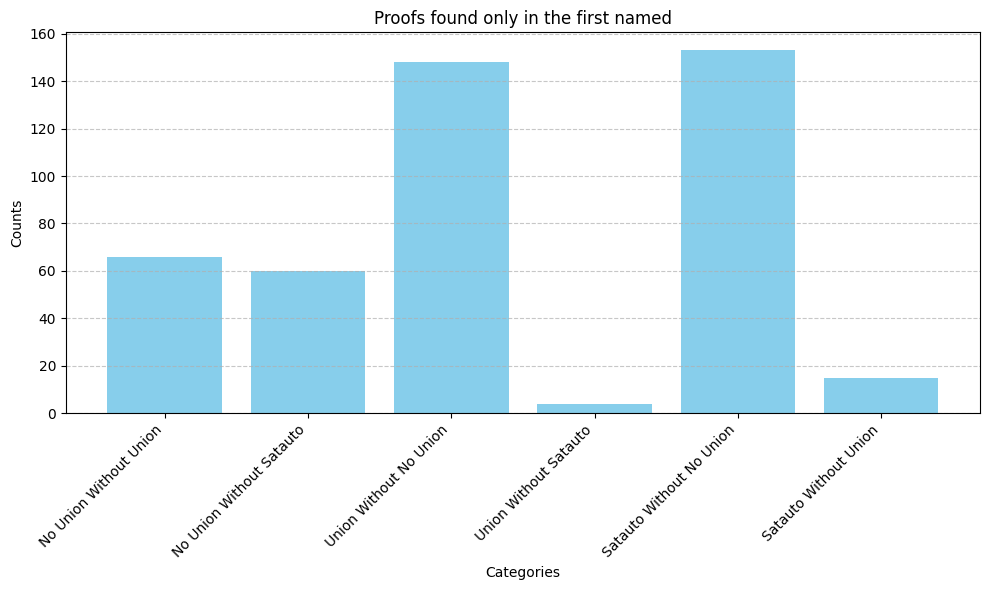

In [16]:
# Data labels
categories = [
    "No Union Without Union", 
    "No Union Without Satauto", 
    "Union Without No Union", 
    "Union Without Satauto", 
    "Satauto Without No Union", 
    "Satauto Without Union"
]

# Corresponding values
values = [66, 60, 148, 4, 153, 15]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')

# Add title and labels
plt.title("Proofs found only in the first named")
plt.xlabel("Categories")
plt.ylabel("Counts")

# Rotate category labels on x-axis for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [17]:
print(len(no_union_without_union))
print(len(no_union_without_satauto))
print(len(union_without_nounion))
print(len(union_without_satauto))
print(len(satauto_without_nounion))
print(len(satauto_without_union))

66
60
148
4
153
15


In [18]:
print(len(auto_no_union_proof))
print(len(auto_union_proof))
print(len(satauto_proof))

309
391
402


In [19]:
time_nounion = [entry[1] for entry in auto_no_union_proof]
time_union = [entry[1] for entry in auto_union_proof]
time_satauto = [entry[1] for entry in satauto_proof]

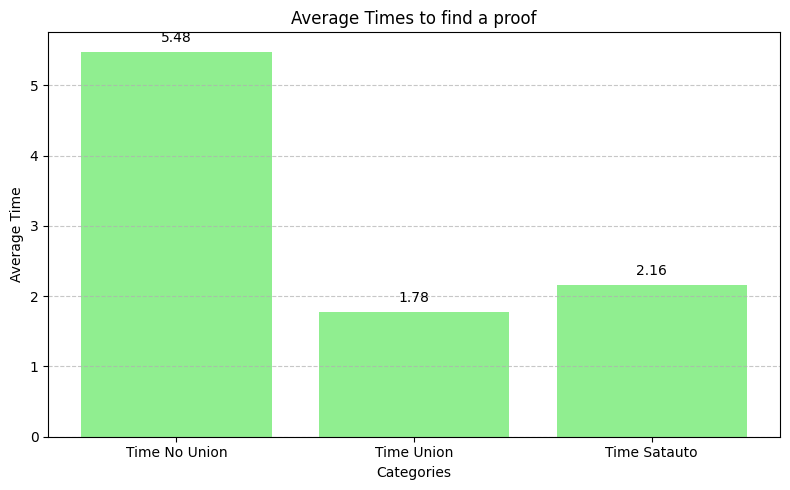

In [20]:

# Data labels
categories = [
    "Time No Union",
    "Time Union",
    "Time Satauto"
]

# Corresponding average values
averages = [
    sum(time_nounion)/len(time_nounion),
    sum(time_union)/len(time_union),
    sum(time_satauto)/len(time_satauto)
]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(categories, averages, color='lightgreen')

# Add title and labels
plt.title("Average Times to find a proof")
plt.xlabel("Categories")
plt.ylabel("Average Time")

# Annotate the bars with the average values
for i, avg in enumerate(averages):
    plt.text(i, avg + 0.1, f"{avg:.2f}", ha='center', va='bottom')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [21]:
print(sum(time_nounion)/len(time_nounion))
print(sum(time_union)/len(time_union))
print(sum(time_satauto)/len(time_satauto))

5.480696725999653
1.7810344238720281
2.158677997280709


time proofs found by sat and not by union

In [22]:
timelist = [a[1] for a in satauto_without_union]
print(sum(timelist)/len(timelist))

5.798877016703288


time proofs found by union and not by sat

In [23]:
timelist = [a[1] for a in union_without_satauto]
print(sum(timelist)/len(timelist))

9.43331891298294


In [24]:
def find_common_entries(list1, list2):
    """
    Find entries that have paths present in both list1 and list2.

    Parameters:
    list1 (list of tuples): The first list, each tuple has a path and a value.
    list2 (list of tuples): The second list, each tuple has a path and a value.

    Returns:
    list of tuples: Entries from list1 with paths also found in list2.
    """
    # Extract paths from each list
    paths_list1 = {entry[0] for entry in list1}
    paths_list2 = {entry[0] for entry in list2}

    # Find common paths between list1 and list2
    common_paths = paths_list1 & paths_list2

    # Build the list of common entries based on the common paths
    common_entries = [entry for entry in list1 if entry[0] in common_paths]

    return common_entries

In [25]:
no_union_with_union = find_common_entries(auto_no_union_proof, auto_union_proof)
no_union_with_satauto = find_common_entries(auto_no_union_proof, satauto_proof)
union_with_nounion = find_common_entries(auto_union_proof, auto_no_union_proof)
union_with_satauto = find_common_entries(auto_union_proof, satauto_proof)
satauto_with_nounion = find_common_entries(satauto_proof, auto_no_union_proof)
satauto_with_union = find_common_entries(satauto_proof, auto_union_proof)

In [26]:
def average_time(listo):
    timelist = [a[1] for a in listo]
    return sum(timelist)/len(timelist)

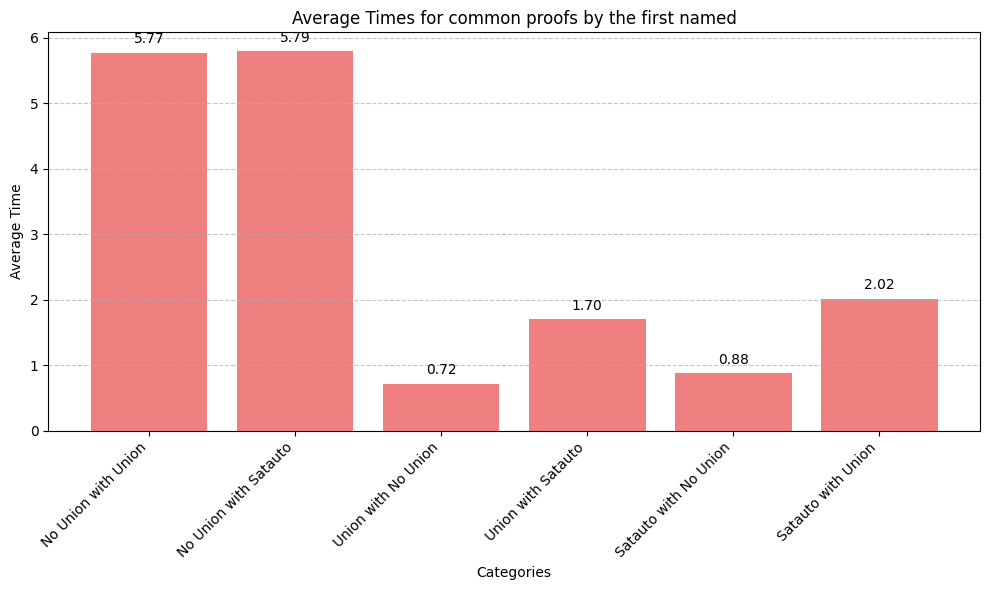

In [27]:

# Sample average time results from the average_time function
# (You will replace these with the actual function call results)
average_times = [
    average_time(no_union_with_union),
    average_time(no_union_with_satauto),
    average_time(union_with_nounion),
    average_time(union_with_satauto),
    average_time(satauto_with_nounion),
    average_time(satauto_with_union)
]

# Labels corresponding to each category
categories = [
    "No Union with Union",
    "No Union with Satauto",
    "Union with No Union",
    "Union with Satauto",
    "Satauto with No Union",
    "Satauto with Union"
]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, average_times, color='lightcoral')

# Add title and labels
plt.title("Average Times for common proofs by the first named")
plt.xlabel("Categories")
plt.ylabel("Average Time")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the average time value
for i, avg in enumerate(average_times):
    plt.text(i, avg + 0.1, f"{avg:.2f}", ha='center', va='bottom')

# Add grid lines to the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
# ot takes the first one x seconds to find a proof for those in common
print(average_time(no_union_with_union))
print(average_time(no_union_with_satauto))
print(average_time(union_with_nounion))
print(average_time(union_with_satauto))
print(average_time(satauto_with_nounion))
print(average_time(satauto_with_union))

5.770150146366637
5.791593746966626
0.7194031638863646
1.7019410441396157
0.8778663236932104
2.017585012031772


Calculate how much longer it takes for one list to find proof

In [29]:
def calculate_summarized_time_diff(list1, list2):
    """
    Calculate the total time difference for entries with paths common to both lists.

    Parameters:
    list1 (list of tuples): The first list, each tuple contains a path and a value.
    list2 (list of tuples): The second list, each tuple contains a path and a value.

    Returns:
    float: The summarized time difference for common paths.
    """
    # Create a dictionary from list2 for fast lookup
    dict2 = {entry[0]: entry[1] for entry in list2}

    summarized_time_diff = 0.0

    for entry in list1:
        path, value1 = entry
        if path in dict2:
            value2 = dict2[path]
            # Calculate and accumulate time difference
            summarized_time_diff += (value1 - value2)
    
    return summarized_time_diff

In [30]:
no_union_without_union_timediff = calculate_summarized_time_diff(auto_no_union_proof, auto_union_proof)
no_union_without_satauto_timediff = calculate_summarized_time_diff(auto_no_union_proof, satauto_proof)
union_without_satauto_timediff = calculate_summarized_time_diff(auto_union_proof, satauto_proof)

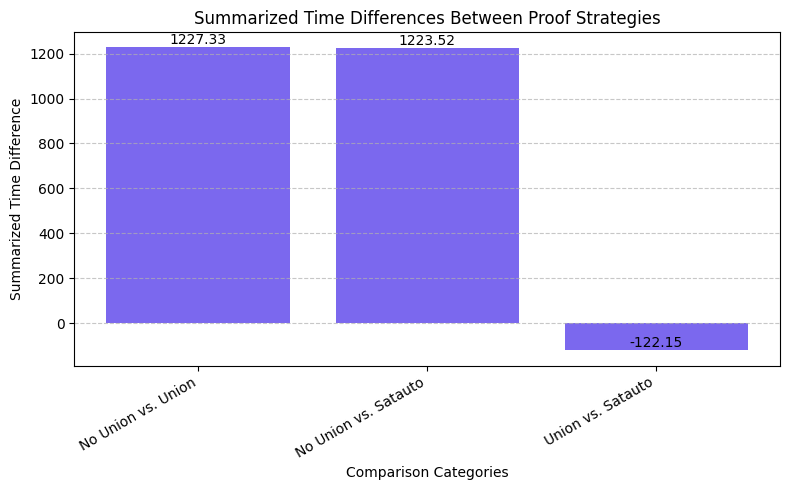

In [31]:
import matplotlib.pyplot as plt

# Sample summarized time difference results
# Replace these with the actual function call results
no_union_without_union_timediff = calculate_summarized_time_diff(auto_no_union_proof, auto_union_proof)
no_union_without_satauto_timediff = calculate_summarized_time_diff(auto_no_union_proof, satauto_proof)
union_without_satauto_timediff = calculate_summarized_time_diff(auto_union_proof, satauto_proof)

# Prepare data for plotting
categories = [
    "No Union vs. Union",
    "No Union vs. Satauto",
    "Union vs. Satauto"
]

# Corresponding time differences
time_differences = [
    no_union_without_union_timediff,
    no_union_without_satauto_timediff,
    union_without_satauto_timediff
]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(categories, time_differences, color='mediumslateblue')

# Add title and labels
plt.title("Summarized Time Differences Between Proof Strategies")
plt.xlabel("Comparison Categories")
plt.ylabel("Summarized Time Difference")

# Annotate the bars with the time difference values
for i, diff in enumerate(time_differences):
    plt.text(i, diff + 0.1, f"{diff:.2f}", ha='center', va='bottom')

# Add grid lines to the y-axis for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
print(no_union_without_union_timediff)
print(no_union_without_satauto_timediff)
print(union_without_satauto_timediff)

1227.3315167427063
1223.5181283950806
-122.15421557426453


# IMPORTANT
used version: 2.6 - with 3.1 Union aint better and satauto not working